
# Project: The Movie Database 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitation">Limitation</a></li>

</ul>

<a id='intro'></a>
## Introduction

<p>For my analysis i chose the movie database, it's contain of the most important data like budget and revenue. Also it's have more information about each movie like title,cast,director...ect</p>
<p>I want to explore from this data the mean budget that may spend to make movie, Which director has experience, which year has release more movie than other (2006-2015),what is the relation between runtime and popularity,the rate of vote average when it more than 6.5 if the genres is Action and which one of(Comedy or Adventure) has popularity more than other.</p>

<p>First I will import the packages that I need for my analysis</p>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
##this method I will you it to answer the last 2 quations
def select_m(column_n):
    return df_movie.query('genres.str.contains("'+column_n+'")',engine='python')

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will show the the general properties that the database have then I will work on cleaning them

### General Properties

Here I read the data base and show the first 5 rows

In [83]:
df_movie=pd.read_csv('tmdb-movies.csv')
df_movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Here will know the total number of rows and columns in database

In [84]:
df_movie.shape

(10866, 21)

Here will we see the number of non-null values and the data types

In [85]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Here will show the numbers of duplicated rows

In [86]:
sum(df_movie.duplicated())

1

Here will show the numbers of unique value foe each columns

In [87]:
df_movie.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

Here will see some statistics 

In [88]:
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning (missing value, unneeded columns)

Here will see how much we have null value

In [89]:
df_movie.isnull().any().sum()

9

First I need to remove all rows that's contain missing values

In [90]:
df_movie.dropna(inplace=True)

To make sure we remove all of them

In [91]:
df_movie.isnull().any().sum()

0

Here I remove some columns that I do not need

In [92]:
df_movie.drop(['homepage','tagline','overview','budget_adj','revenue_adj'],axis=1,inplace=True)
df_movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis

### What is the mean budget that may spend to make movie?

here I calculate the mean budget and round it

In [93]:
np.round(df_movie.budget.mean())

34549236.0

### Which director has experience to investment him?

I want to see the top 6 directors that they have made more movies 
<ul>
<li>First count the number of movie for each director and I select represent the top 6</li>
<li>After that I list their name insid list</li>
 </ul>

In [94]:
top_6=df_movie.director.value_counts().nlargest(6)

Dlist=['John Carpenter','Steven Soderbergh','Steven Spielberg','Clint Eastwood','Ridley Scott','Robert Zemeckis']

Now I have the needed input and I will visualize them using pie chart 

([<matplotlib.patches.Wedge at 0x6a84aa8610>,
 [Text(1.0917815787165628, 1.237139031950399, 'John Carpenter'),
  Text(-1.02875830247466, 1.290021842873002, 'Steven Soderbergh'),
  Text(-1.6172845629214665, -0.3269413441825944, 'Steven Spielberg'),
  Text(-0.6786234709484772, -1.5039847687652432, 'Clint Eastwood'),
  Text(0.6028130154782936, -1.535941557602361, 'Ridley Scott'),
  Text(1.5204359148435478, -0.6409170218162916, 'Robert Zemeckis')],
 [Text(0.5955172247544886, 0.6748031083365812, '27%'),
  Text(-0.5611408922589054, 0.7036482779307281, '17%'),
  Text(-0.8821552161389815, -0.1783316422814151, '17%'),
  Text(-0.3701582568809875, -0.8203553284174052, '13%'),
  Text(0.3288070993517965, -0.8377863041467422, '13%'),
  Text(0.8293286808237531, -0.3495911028088863, '13%')])

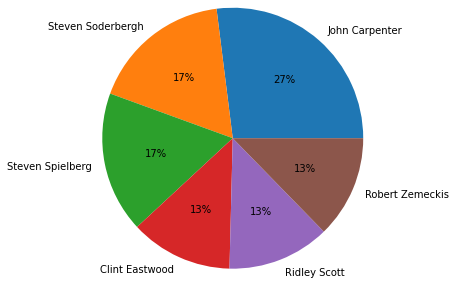

In [95]:
plt.pie(top_6,labels=Dlist,radius=1.5,autopct='%1.0f%%')

### From 2006 to 2015 which year has release more movie than other?

I count the number of movie for each year, then I select only last 10 year

Text(0.5, 0, 'number of release')

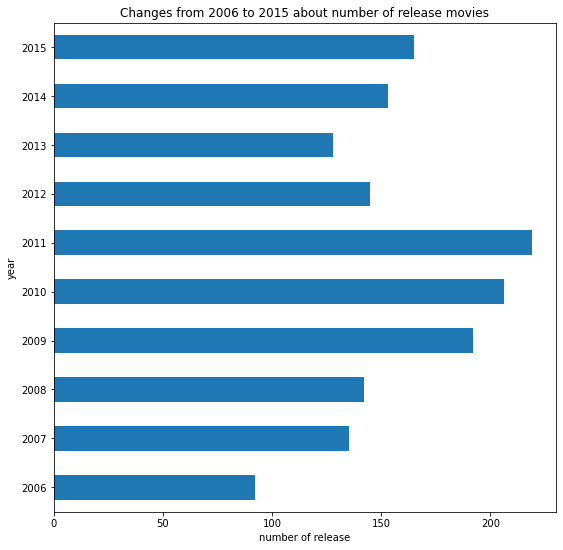

In [96]:
df_movie.release_year.value_counts().sort_index().tail(10).plot(title='Changes from 2006 to 2015 about number of release movies',figsize=(9,9),kind='barh')
plt.ylabel("year")
plt.xlabel("number of release")


### What is the relation between runtime and population?

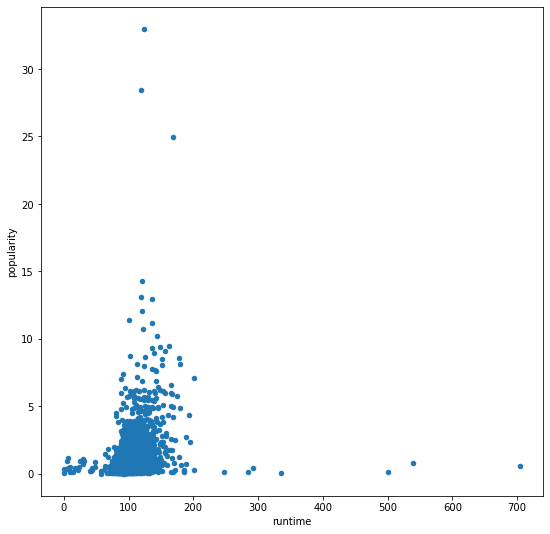

In [97]:
df_movie.plot(x='runtime',y='popularity',figsize=(9,9),kind='scatter')

### What is the rate of vote average when it more than 6.5 if the genres is Action?

I select only the movies that have genres action

In [98]:
df=select_m('Action')

<ul>
    <li>calculate number of movie with vote average less than 6.5</li>
    <li>calculate number of movie with vote average higher than 6.5</li>
    <li>calculate the total of them</li>
    </ul>

In [99]:
less_vote=len(df.loc[df['vote_average']<6.5])

high_vote=len(df.loc[df['vote_average']>=6.5])

total_vote=less_vote+high_vote

<p>I prefer visualize this data on bar chart.</p>
<p>first I send the data and columns name then I put the title</p>
<p>After that I try to show the presentage of each</p>
<p>in the last I name the x-axis and y-axis</p>

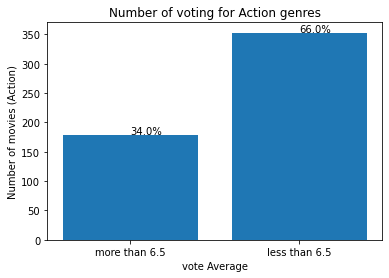

In [100]:
plt.bar(["more than 6.5","less than 6.5"],[high_vote,less_vote])
plt.title("Number of voting for Action genres")
plt.text(0,high_vote+1,str(np.round((high_vote/total_vote)*100))+"%")
plt.text(1,less_vote+1,str(np.round((less_vote/total_vote)*100))+"%")
plt.xlabel("vote Average")
plt.ylabel("Number of movies (Action)");

### which genres has  popularity more than other if the movie genres is Comedy or Adventure?

I select only the movies that have genres comedy

In [101]:
df=select_m('Comedy')

calculate the mean

In [102]:
pop_mean=df.popularity.mean()
print(pop_mean)

1.0663249687499994


Here I use the mean of the popularity to help me answer this question
<ul>
    <li>calculate number of movie with popularity less than mean</li>
    <li>calculate number of movie with popularity higher than mean</li>
    <li>calculate the total of them</li>
    </ul>

In [103]:
less_pop=len(df.loc[df['popularity']<pop_mean])

high_pop=len(df.loc[df['popularity']>=pop_mean])

total_pop=less_pop+high_pop

<p>I used to visualize this data on bar chart.</p>
<p>first I send the data and columns name then I put the title</p>
<p>After that I try to show the presentage of each</p>
<p>in the last I name the x-axis and y-axis</p>

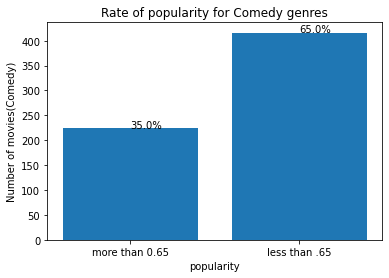

In [104]:
plt.bar(["more than 0.65","less than .65"],[high_pop,less_pop])
plt.title("Rate of popularity for Comedy genres")
plt.text(0,high_pop+1,str(np.round((high_pop/total_pop)*100))+"%")
plt.text(1,less_pop+1,str(np.round((less_pop/total_pop)*100))+"%")
plt.xlabel("popularity")
plt.ylabel("Number of movies(Comedy)");

Here I will do the same for Adventure genres.

In [105]:
df=select_m('Adventure')

In [106]:
pop_mean=df.popularity.mean()
print(pop_mean)

2.5875802022160657


In [107]:
less_pop=len(df.loc[df['popularity']<pop_mean])

high_pop=len(df.loc[df['popularity']>=pop_mean])

total_pop=less_pop+high_pop

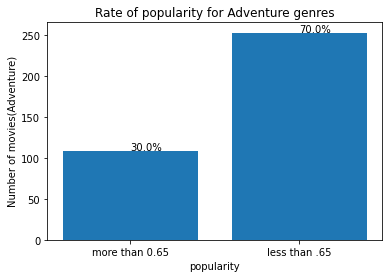

In [108]:
plt.bar(["more than 0.65","less than .65"],[high_pop,less_pop])
plt.title("Rate of popularity for Adventure genres")
plt.text(0,high_pop+1,str(np.round((high_pop/total_pop)*100))+"%")
plt.text(1,less_pop+1,str(np.round((less_pop/total_pop)*100))+"%")
plt.xlabel("popularity")
plt.ylabel("Number of movies(Adventure)");

<a id='conclusions'></a>
## Conclusions

<p>From what I see on my analysis report I can answer my questions, I will start with the first one: like we see the mean budget that I may spend when making movie is 34549236. </p>
<p>I think if I invest with John Carpenter, Steven Soderbergh or Steven Spielberg it is will good chose because they are have more experience.</p>
<p>From bar chart for the number of release the movie I see the most year has release more than 200 movie and more than other year is 2011></p>
<p>I was wonder if the more runtime mean have more popularity, from what I see there are some movie that we can count them have popularity.</p>
<p>I was curious of the rate if the movies with genres Action have vote average more than 6.5. this will help to decide the genres of the new movie. from what appear on the chart I think it is will be good if we do not choose Action as genres on the new film because there are more than 60% have less vote average, so I analysis the people loss their interest on this kind of genres.</p>
<p>we think of which one from comedy and adventure has more popularity, we can see from the char that the comedy have more popularity than the adventure. Also we can see that the comedy has more released movie but the adventure has around half less the release movie from comedy type. For that we recommend add comedy with the new movie.


<a id='limitation'></a>
## Limitation
I see some limitation when working with this data:
<ul>
    <li>The most limitation affect my analysis and it's visualization ia null value that Forced me to remove all of them. </li>
    <li>I would like if the move database add new column about the writer, with add this will help to know which writer have experience and which one write popular movie. </li>
</ul>

#### References:
##### I use this website to get more understand for the method and their parameter
 {https://pandas.pydata.org/pandas-docs/stable/reference/index.html#api}
 
##### I use this website to help me draw pie chart
 {https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html}

##### I use this website to know how to write number above the bar chart and I learn how to do the horizontal bar chart
 {https://www.kite.com/python/answers/how-to-display-the-value-of-each-bar-in-a-bar-chart-using-matplotlib-in-python}</p>